In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
single_image= X_train[0]

In [7]:
single_image.shape

(28, 28)

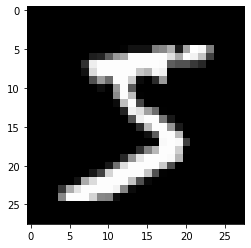

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(60000, 10)

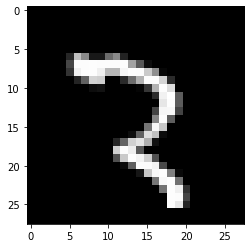

In [19]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [20]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [22]:
X_train_scaled.shape

(60000, 28, 28, 1)

In [23]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
__________________________________________________

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [26]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 47s 47ms/step - loss: 0.2463 - accuracy: 0.9277 - val_loss: 0.1061 - val_accuracy: 0.9687
Epoch 2/5
938/938 [==============================] - 35s 38ms/step - loss: 0.0831 - accuracy: 0.9758 - val_loss: 0.0670 - val_accuracy: 0.9773
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0592 - accuracy: 0.9825 - val_loss: 0.0559 - val_accuracy: 0.9803
Epoch 4/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0473 - accuracy: 0.9858 - val_loss: 0.0525 - val_accuracy: 0.9817
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0531 - val_accuracy: 0.9819


In [28]:
metrics = pd.DataFrame(model.history.history)

In [29]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.246345,0.927683,0.106130,0.9687
1,0.083130,0.975833,0.066956,0.9773
2,0.059241,0.982533,0.055918,0.9803
3,0.047283,0.985767,0.052550,0.9817
4,0.038899,0.987950,0.053128,0.9819


<AxesSubplot:>

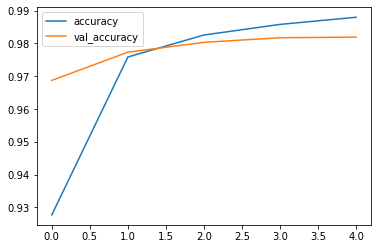

In [30]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

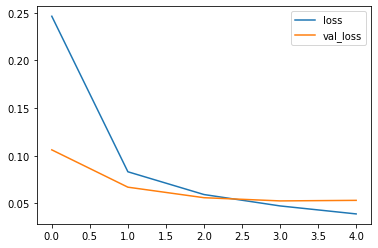

In [31]:
metrics[['loss','val_loss']].plot()

In [32]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [33]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 970    1    2    0    1    2    2    1    1    0]
 [   0 1132    1    1    0    0    0    0    1    0]
 [   1    6 1013    1    2    0    1    7    1    0]
 [   0    0    1  991    0   11    0    2    2    3]
 [   0    1    2    0  972    0    0    0    0    7]
 [   0    0    0    4    0  886    1    0    0    1]
 [   6    3    0    0    2    8  937    0    2    0]
 [   0    4   10    2    0    0    0 1006    1    5]
 [   5    1    8    5    5    5    1    5  927   12]
 [   1    3    0    0    7    5    0    8    0  985]]


In [34]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.95      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [35]:
img = image.load_img('image.jpg')

In [36]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [37]:
img = image.load_img('image.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [38]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [39]:
print(x_single_prediction)

[8]


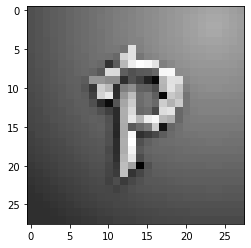

In [40]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [41]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [42]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)
     

In [43]:
print(x_single_prediction)

[8]
